In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import keras
from keras import layers

df = pd.read_csv('./Datasets/Fact_Dimension_tables/FactTable.csv', encoding='ISO-8859-1', header=0)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import keras
from keras import layers

df = pd.read_csv('./Datasets/Fact_Dimension_tables/FactTable.csv', encoding='ISO-8859-1', header=0)
# Load your data
# Assuming your dataframe is named 'df'
# Make sure to include the 'Sales' column as your target variable
features = df[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 
               'Sales per customer', 'Latitude', 'Longitude', 'Order Item Discount', 
               'Order Item Discount Rate', 'Order Item Profit Ratio', 'Order Item Quantity',
               'Market_Id', 'Del_Status_Id', 'Ship_Mode_id', 'Cust_Country_Id', 
               'Cust_City_Id', 'Cust_Seg_Id', 'Pay_Type_Id', 'Dep_Id', 'Ord_Cty_Id', 
               'Ord_Ctry_Id', 'Ctg_Name_Id', 'Order Year', 'Order Month']]

target = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
#model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)
X_train_scaled


array([[ 1.54007836, -0.67941423,  0.75956925, ...,  0.69476622,
        -1.17189875, -0.94992499],
       [-0.92273388, -1.40724106,  0.51296542, ..., -0.97615907,
        -1.17189875,  0.51944918],
       [ 1.54007836,  0.77623942, -0.06958731, ...,  1.41883385,
         1.24076272,  0.51944918],
       ...,
       [ 1.54007836, -0.67941423, -3.19476001, ...,  1.64162389,
         0.03443199,  0.81332401],
       [-0.30703082, -0.67941423,  0.53001529, ...,  1.6973214 ,
        -1.17189875,  1.69494852],
       [ 1.54007836,  0.77623942,  0.64060126, ...,  1.64162389,
         0.03443199, -0.06830049]])

1129/1129 [==============================] - 2s 1ms/step
Mean Squared Error: 0.04034960126509893


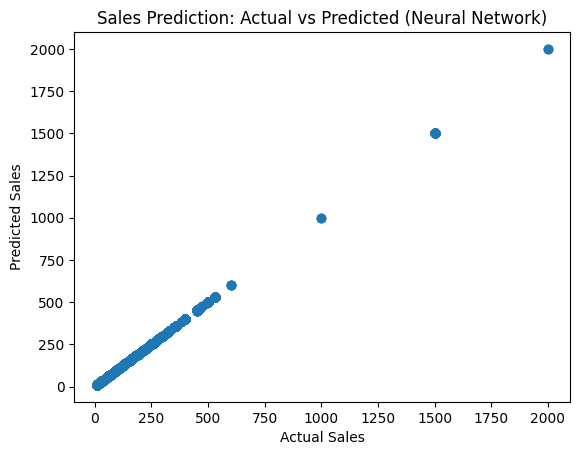

In [4]:
# Evaluate the model on the test set
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs predicted sales
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)
plt.title('Sales Prediction: Actual vs Predicted (Neural Network)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

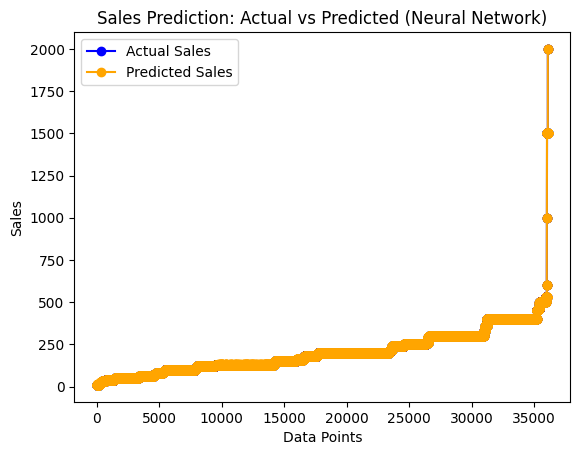

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Sort the values for better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
predictions_sorted = predictions[sorted_indices]

# Parallel line plot for comparing actual vs predicted sales
plt.plot(y_test_sorted.values, label='Actual Sales', linestyle='-', marker='o', color='blue')
plt.plot(predictions_sorted, label='Predicted Sales', linestyle='-', marker='o', color='orange')
plt.title('Sales Prediction: Actual vs Predicted (Neural Network)')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.legend()
plt.show()

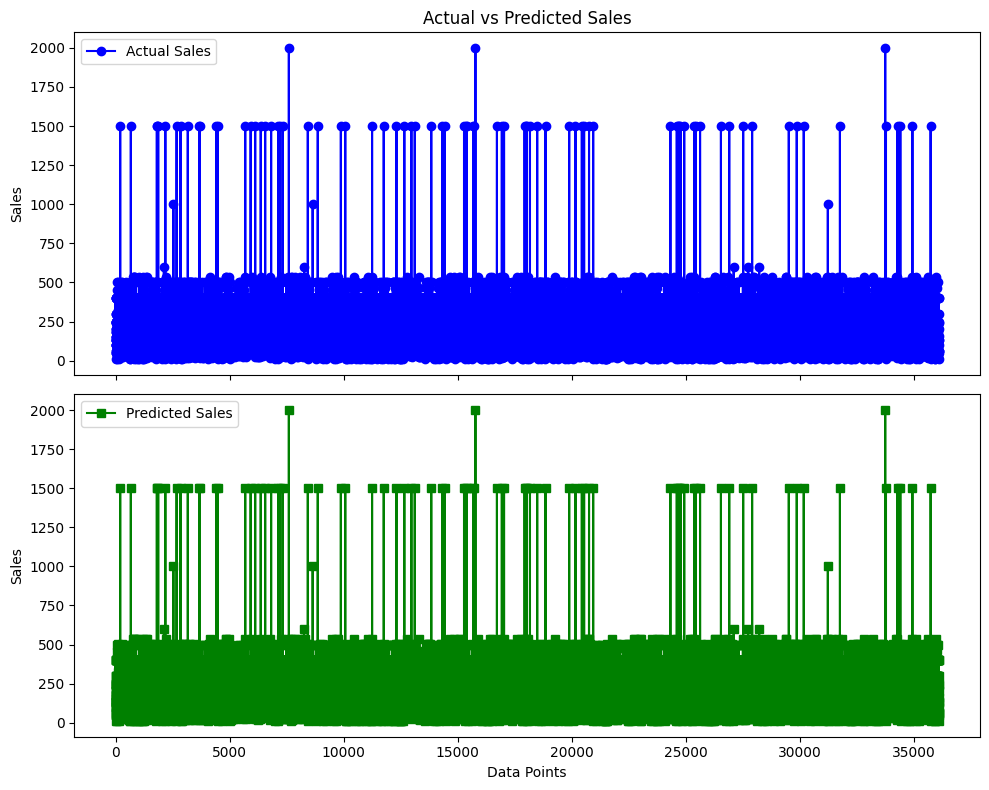

In [12]:

y_test = np.array(y_test)
predictions = np.array(predictions)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plotting actual values
axs[0].plot(y_test, color='blue', marker='o', label='Actual Sales')
axs[0].set_title('Actual vs Predicted Sales')
axs[0].set_ylabel('Sales')
axs[0].legend()

# Plotting predicted values
axs[1].plot(predictions, color='green', marker='s', label='Predicted Sales')
axs[1].set_xlabel('Data Points')
axs[1].set_ylabel('Sales')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

In [9]:
predictions

array([[100.19347  ],
       [299.8832   ],
       [399.9382   ],
       ...,
       [ 11.3389635],
       [ 99.97484  ],
       [160.06815  ]], dtype=float32)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test contains actual values and predictions contains predicted values
# Replace these with your actual variable names
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared (R2) score
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 0.04034960126509893
Mean Absolute Error (MAE): 0.15618196932530165
R-squared (R2) Score: 0.9999976184374055


In [14]:
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales['Sales'] = monthly_sales['Sales'].replace('[\$,]', '', regex=True).astype(float)
monthly_sales

,Order Year,Order Month,Sales
0,2015,1,1.051590e+06
1,2015,2,9.270099e+05
2,2015,3,1.051254e+06
3,2015,4,1.014463e+06
4,2015,5,1.050478e+06
5,2015,6,1.024006e+06
6,2015,7,1.038081e+06
7,2015,8,1.029495e+06
8,2015,9,1.018339e+06
9,2015,10,1.049154e+06


In [15]:
features = monthly_sales[['Order Year', 'Order Month']]
target = monthly_sales[['Sales']]

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6110 - val_loss: 0.7112
Epoch 2/50
1/1 [==============================] - 0s 37ms/step - loss: 0.5915 - val_loss: 0.6895
Epoch 3/50
1/1 [==============================] - 0s 44ms/step - loss: 0.5721 - val_loss: 0.6678
Epoch 4/50
1/1 [==============================] - 0s 38ms/step - loss: 0.5526 - val_loss: 0.6461
Epoch 5/50
1/1 [==============================] - 0s 39ms/step - loss: 0.5332 - val_loss: 0.6243
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.5137 - val_loss: 0.6023
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.4941 - val_loss: 0.5805
Epoch 8/50
1/1 [==============================] - 0s 39ms/step - loss: 0.4748 - val_loss: 0.5588
Epoch 9/50
1/1 [==============================] - 0s 40ms/step - loss: 0.4555 - val_loss: 0.5369
Epoch 10/50
1/1 [==============================] - 0s 42ms/step - loss: 0.4361 - val_loss: 0.5148
Epoch 11/50
1/1 [==============

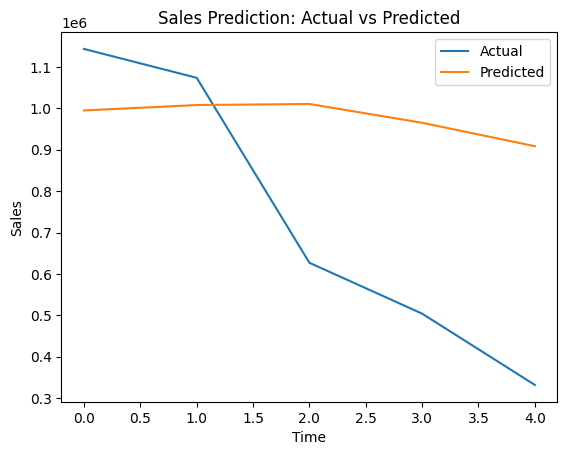

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Assuming your data is stored in a DataFrame named 'sales_data'
# Make sure the 'Sales' column is numeric (remove commas and convert to float)

monthly_sales['Sales'] = monthly_sales['Sales'].astype(float)
# Extract features and target variable
features = monthly_sales[['Order Year', 'Order Month']]
target = monthly_sales['Sales']

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Combine features and scaled target
data = pd.concat([features, pd.DataFrame(target_scaled, columns=['Scaled Sales'])], axis=1)

# Define a function to create time series sequences
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i+seq_length, 2]  # Assuming 'Scaled Sales' is the third column
        label = data.iloc[i+seq_length, 2]
        sequences.append(seq.values)
        target.append(label)
    return np.array(sequences), np.array(target)

# Choose the sequence length (you can experiment with different values)
sequence_length = 12  # For monthly data, you might consider a yearly sequence

# Create sequences and target
X, y = create_sequences(data, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM (batch_size, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = keras.Sequential([
    layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
predictions_original_scale = scaler.inverse_transform(predictions.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(target.values[sequence_length + train_size:], predictions_original_scale)
print(f'Mean Squared Error (MSE): {mse}')

# Visualize actual vs predicted sales
import matplotlib.pyplot as plt

actual = target.values[sequence_length + train_size:]
plt.plot(actual, label='Actual')
plt.plot(predictions_original_scale, label='Predicted')
plt.title('Sales Prediction: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [17]:
monthly_sales

,Order Year,Order Month,Sales
0,2015,1,1.051590e+06
1,2015,2,9.270099e+05
2,2015,3,1.051254e+06
3,2015,4,1.014463e+06
4,2015,5,1.050478e+06
5,2015,6,1.024006e+06
6,2015,7,1.038081e+06
7,2015,8,1.029495e+06
8,2015,9,1.018339e+06
9,2015,10,1.049154e+06


In [ ]:
data['Date'] = pd.to_datetime(monthly_sales[['Order Year', 'Order Month']].assign(DAY=1))


# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Prepare the data for time series forecasting
X, y = [], []
for i in range(len(data_scaled)-12):
    X.append(data_scaled[i:i+12])
    y.append(data_scaled[i+12, 0])  # Assuming you want to predict the first column (Sales)

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Plot actual vs predicted sales
plt.plot(y_test, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales')
plt.legend()
plt.show()